## Day 35 Assignment

### Question 1:
1. Use the User dataset perform Random Forest and compare with Decision Tree.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline

/Users/Pooja/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('datasets/User_Data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X=df.iloc[:,[2,3]].values
y=df.iloc[:,4].values

In [4]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [5]:
scaler= StandardScaler()

In [6]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Decision tree

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
DT_classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)

In [9]:
DT_classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [10]:
DT_pred= DT_classifier.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc

In [12]:
print(confusion_matrix(y_test,DT_pred))
print(classification_report(y_test,DT_pred))

[[70  9]
 [ 4 37]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        79
           1       0.80      0.90      0.85        41

    accuracy                           0.89       120
   macro avg       0.88      0.89      0.88       120
weighted avg       0.90      0.89      0.89       120



In [13]:
print(accuracy_score(y_test,DT_pred))

0.8916666666666667


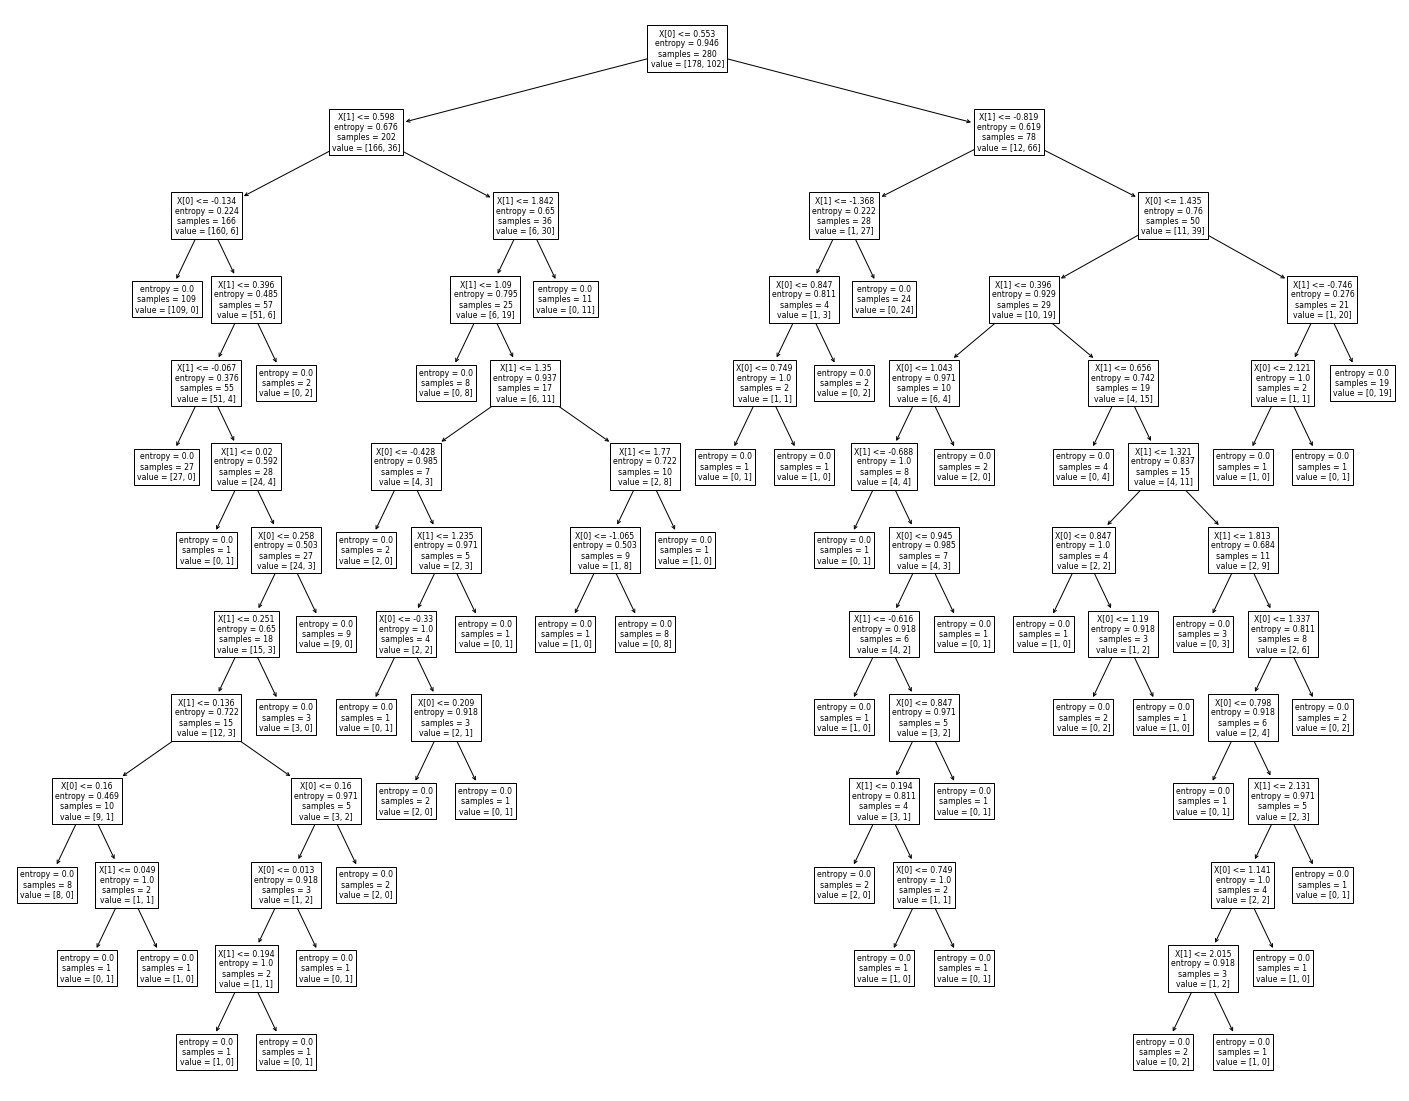

In [14]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DT_classifier)

### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rfc= RandomForestClassifier(n_estimators=100,
    criterion='entropy')

In [17]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [18]:
rfc_pred=rfc.predict(X_test)

In [19]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[72  7]
 [ 5 36]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92        79
           1       0.84      0.88      0.86        41

    accuracy                           0.90       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120



In [20]:
print(accuracy_score(y_test,rfc_pred))

0.9


### ROC_curve

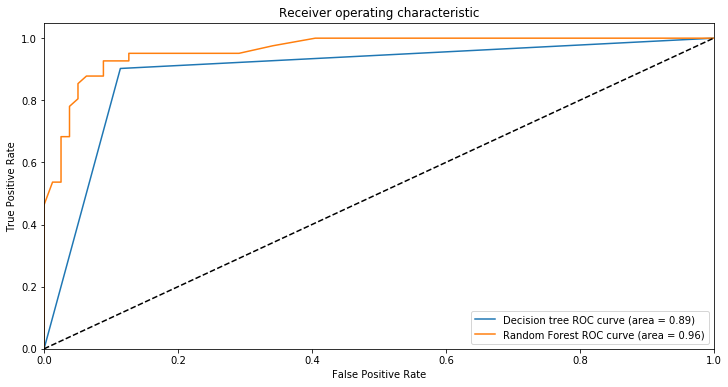

In [22]:
#computing probability of decision tree and calculating false positive and true positive
DT_y_pred = DT_classifier.predict_proba(X_test)[:,1]
fpr1, tpr1, th1 = roc_curve(y_test, DT_y_pred)
roc_auc1 = auc(fpr1, tpr1) # compute area under the curve


#computing probability of decision tree and calculating false positive and true positive
rfc_y_pred = rfc.predict_proba(X_test)[:,1]
fpr2, tpr2, th2 = roc_curve(y_test, rfc_y_pred)
roc_auc2 = auc(fpr2, tpr2) # compute area under the curve

#ploting figure
plt.figure(figsize=(12,6))
plt.plot(fpr1, tpr1, label='Decision tree ROC curve (area = %0.2f)' % (roc_auc1))
plt.plot(fpr2, tpr2, label='Random Forest ROC curve (area = %0.2f)' % (roc_auc2))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

### Conclude

Here, you can see that **decison tree accuaracy(0.89) and roc_curve area(0.89)** is less than **Random Forest's accuracy(0.91) and roc_curve area(0.96)**.
### Thus, Random forest perfroms better than Decision Tree.